# This notebook ellustrate how A* works

**spirit of A*:  always search lowest cost node, cost = known cost + heuristic
known cost is something for sure, i.e. the path to a node
heuristic is a "guess" for the unknown/unsearched path from the unexplored node to target

# Why is A* good?
Because it takes target into account during searching by measuring a heuristic. Compared to breath-first or depth-first, the 2 searching are like headless chooks, not doing anything related to target.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

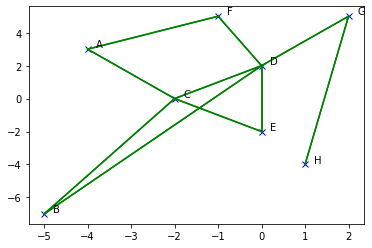

In [25]:
# In this cell, we set up some graph: nodes and paths between them

# This class represents a location in space, and it has paths to other locations
class Node:
    def __init__(self, name, x, y):
        self.name = name
        self.loc = (x, y)
        self.paths = {}
    
    def AddPath(self, otherNode):
        cost = np.linalg.norm(np.subtract(self.loc, otherNode.loc)) # we use euclidean distance as the cost of path
        self.paths[otherNode.name] = (otherNode, cost)
    
    def plot(self):
        plt.plot([self.loc[0]], [self.loc[1]], 'bx')
        plt.text(self.loc[0] + 0.2, self.loc[1] + 0.1, self.name)
        for otherNode, _ in self.paths.values():
            plt.plot([self.loc[0], otherNode.loc[0]], [self.loc[1], otherNode.loc[1]], 'g-')
        
def AddPath(node1, node2):
    node1.AddPath(node2)
    node2.AddPath(node1)

A = Node("A", -4, 3)
B = Node("B", -5, -7)
C = Node("C", -2, 0)
D = Node("D", 0, 2)
E = Node("E", 0, -2)
F = Node("F", -1, 5)
G = Node("G", 2, 5)
H = Node("H", 1, -4)
allNodes = [A, B, C, D, E, F, G, H]

AddPath(A, C)
AddPath(A, F)
AddPath(B, C)
AddPath(B, D)
AddPath(C, D)
AddPath(C, E)
AddPath(D, E)
AddPath(D, F)
AddPath(D, G)
AddPath(G, H)

# draw all nodes and paths
for node in allNodes:
    node.plot()

## How to we find shortest path using A*
1. Start: it puts all paths can go from the starting node, all paths are with a value: actual path cost + heuristic
2. Iterate: it gets the lowest path from the queue, see if it has reached the target, if not, try to explore the path further to unexplored node, then put the path in the queue again with re-evaluated cost
3. Iterate will go until if finds the shortest path or it ends when the paths queue is empty, meaning the path doesn't exist.

## What's actual path cost and what's heuristic?
Actual path cost is the known cost from 1 point to another, in our case, A->C->B is the euclidean distance of AC + CB. Heuristic is the guessed cost from a point to another, in our example, we use euclidean distance. There are some requirements for heuristic: it needs to be admissible, **meaning it cannot overestimate.


## Technically how does it manage the paths it's searching?
One solution is to use "priority queue" which effectively gets the lowest/highest value item, and effectively puts new items to the structure with the priority/cost managed.

searching ['A', 'C'] with total and path costs: 8.60555127546399 3.605551275463989
searching ['A', 'C', 'E'] with total and path costs: 8.67004637770997 6.433978400210179
searching ['A', 'C', 'D'] with total and path costs: 12.516740930508398 6.433978400210179
searching ['A', 'F'] with total and path costs: 12.825095732756877 3.605551275463989
searching ['A', 'C', 'B'] with total and path costs: 17.92952831382727 11.221324381327898
searching ['A', 'C', 'D', 'G'] with total and path costs: 19.094914813811585 10.039529675674169
searching ['A', 'C', 'D', 'G', 'H'] with total and path costs: 19.094914813811585 19.094914813811585


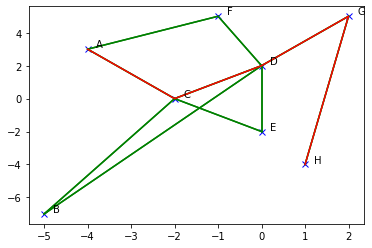

In [38]:
# algorithm
import heapq # heapq is an implementation of 'priority queue'

# this function finds the shortest path from A to the target
# it returns all nodes in the path in order
def Astar(node, targetNode):
    exploredNames = set('A') # we keep this for explored nodes, so we don't search the nodes again and again
    paths = []
    for to, cost in node.paths.values():
        path = [A, to]
        exploredNames.add(to.name)
        # the reason we use total cost as 1st parameter is heapq will use it as 'priority',
        # 2nd cost parameter is the actual path cost for explored path
        heuristic = np.linalg.norm(np.subtract(to.loc, targetNode.loc))
        heapq.heappush(paths, (cost + heuristic, cost, path))
    
    while len(paths) > 0:
        totalCost, pathCost, path = heapq.heappop(paths) # every time, we are exploring the lowest cost path
        print('searching', [node.name for node in path], 'with total and path costs:', totalCost, pathCost)
        if path[-1].name == targetNode.name:
            # we found it
            return path
        
        # explore the paths further
        for to, cost in path[-1].paths.values():
            if to.name not in exploredNames:
                newPath = path[:] + [to]
                exploredNames.add(to.name)
                heuristic = np.linalg.norm(np.subtract(to.loc, targetNode.loc))
                heapq.heappush(paths, (heuristic + pathCost + cost, pathCost + cost, newPath))
    
    # if it can't find anything, then there's no path to the target
    return None

path = Astar(A, H)
        
# draw all nodes and paths
for node in allNodes:
    node.plot()
    
# draw shortest path
sxs, sys = zip(*[node.loc for node in path])
plt.plot(sxs, sys, 'r-')
